In [1]:
# Importing Libraries
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt
import ast

#loading data
dataset = load_dataset("lukebarousse/data_jobs")
df = dataset['train'].to_pandas()

#data cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'], errors='coerce')
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

d:\Anaconda\envs\cursito\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
#only get data analyst jobs in the us
df_da_us = df[(df['job_title_short'] == 'Data Analyst') &    (df['job_country'] == 'United States')].copy()

#drop na values
df_da_us = df_da_us.dropna(subset=['salary_year_avg'])

C:\Users\moco\AppData\Local\Temp\ipykernel_21180\1474725877.py:9: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(job_list, labels=job_titles , vert=False) #job_values provides different series values for data engineer ..., labels just the names of the jobs


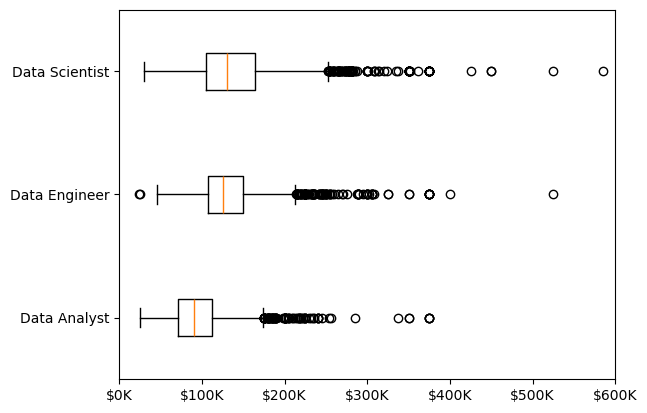

: 

In [ ]:
#matplotlib func
job_titles = ['Data Analyst', 'Data Engineer', 'Data Scientist']

df_us = df[(df['job_title_short'].isin(job_titles)) &    (df['job_country'] == 'United States')].copy()
df_us = df_us.dropna(subset='salary_year_avg')

job_list = [df_us[df_us['job_title_short']== job_title]['salary_year_avg'] for job_title in job_titles]

plt.boxplot(job_list, labels=job_titles , vert=False) #job_values provides different series values for data engineer ..., labels just the names of the jobs

ax = plt.gca() #get corrunt axis
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}K'))
plt.xlim(0, 600000)
plt.show()


In [7]:
df_us['salary_year_avg']

92        120000.0
100       228222.0
109        89000.0
116       114000.0
146       129500.0
            ...   
785563    136400.0
785624    139216.0
785641    150000.0
785648    221875.0
785692    157500.0
Name: salary_year_avg, Length: 11818, dtype: float64